In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
train = pd.read_csv("C:/Users/YYW/Downloads/train (1).csv")
test = pd.read_csv("C:/Users/YYW/Downloads/test (1).csv")

In [4]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

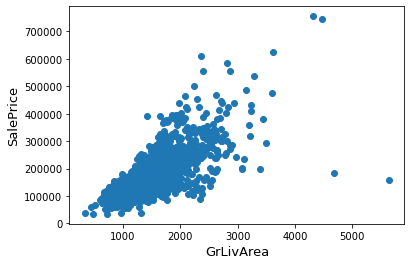

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [9]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

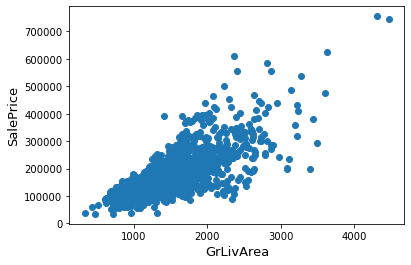

In [10]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [11]:
cor = train.corr()
cor_fe = cor.index[abs(cor['SalePrice']) >= 0.3]
cor_fe

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

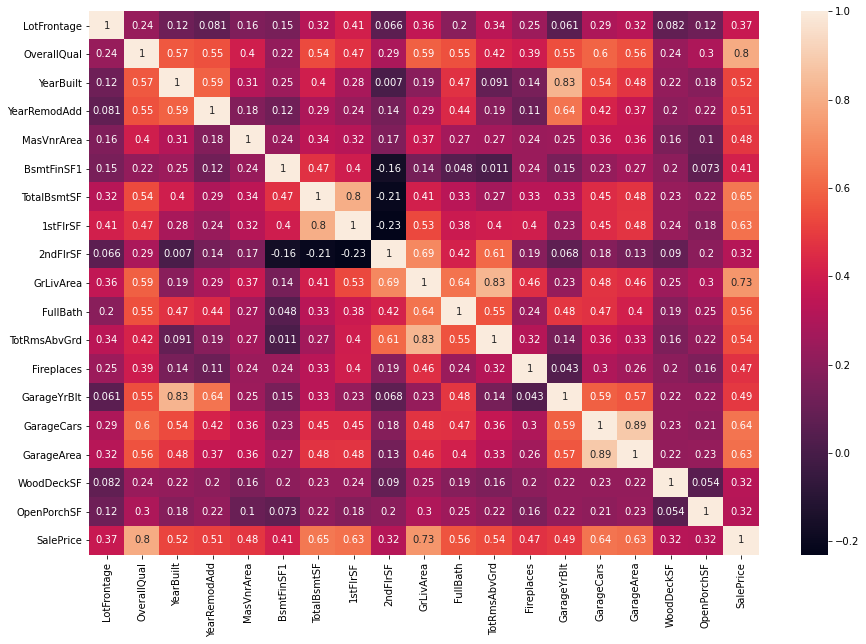

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(train[cor_fe].corr(),annot=True)

In [13]:
fe_name = list(test)
df_train = train[fe_name]
df = pd.concat((df_train,test))

In [14]:
print(train.shape, test.shape, df.shape)

(1458, 81) (1459, 80) (2917, 80)


In [15]:
from scipy import stats
from scipy.stats import norm

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

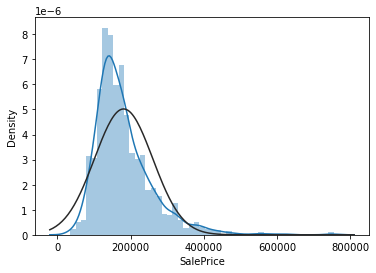

In [16]:
sns.distplot(train['SalePrice'],fit = norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

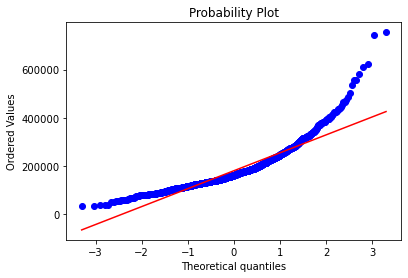

In [17]:
stats.probplot(train['SalePrice'], plot=plt)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

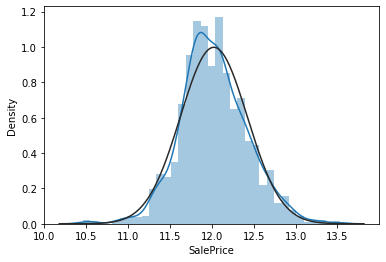

In [18]:
train['SalePrice'] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'],fit=norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3985294832980731, 12.024015155682548, 0.9953918721417083))

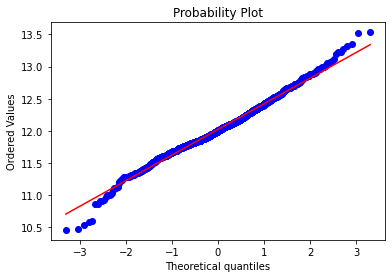

In [19]:
stats.probplot(train['SalePrice'], plot=plt)

In [20]:
target = train['SalePrice']

In [21]:
null_df = (df.isna().sum() / len(df)) *100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :null_df})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806
GarageYrBlt,5.450806


<AxesSubplot:>

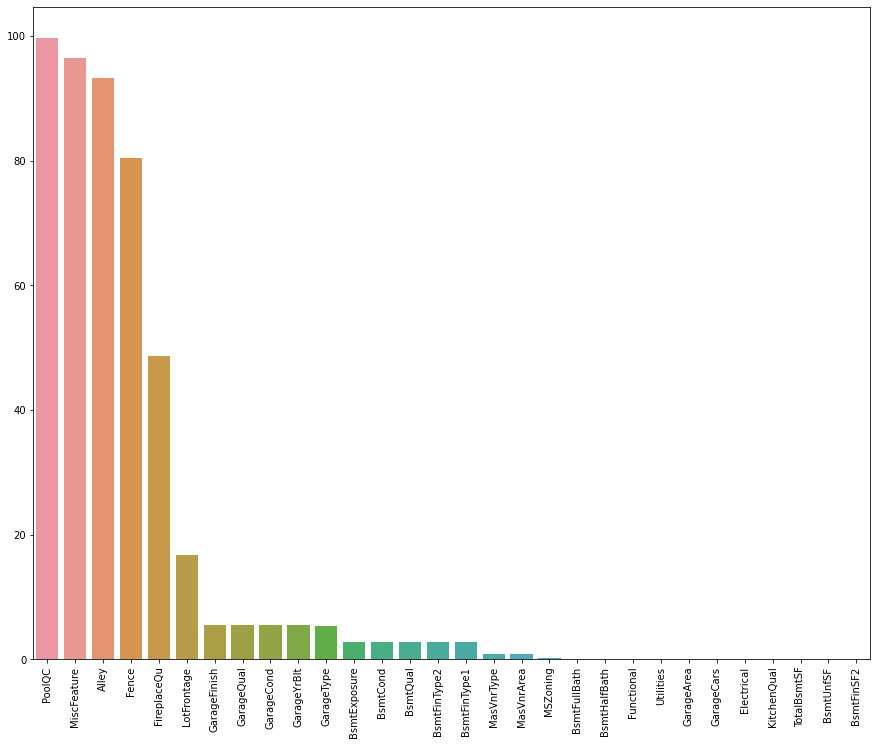

In [22]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=null_df.index, y=null_df)

In [23]:
df["PoolQC"] = df["PoolQC"].fillna("None")

In [24]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")

In [42]:
df["Alley"] = df["Alley"].fillna("None")

In [25]:
df["Fence"] = df["Fence"].fillna("None")

In [26]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In [27]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [28]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [29]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

In [30]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

In [31]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [32]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [33]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [34]:
df = df.drop(['Utilities'], axis=1)

In [35]:
df["Functional"] = df["Functional"].fillna("Typ")

In [36]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [37]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [38]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [39]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [40]:
df['MSSubClass'] = df['MSSubClass'].fillna("None")

In [43]:
null_df = (df.isna().sum() / len(df)) *100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :null_df})
missing_data.head(20)

,Missing Ratio


In [44]:
#MSSubClass
df['MSSubClass'] = df['MSSubClass'].apply(str)
#OverallCond
df['OverallCond'] = df['OverallCond'].astype(str)
#YrSold,MoSold
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [45]:
df_obj = df.select_dtypes(include='object')
df_obj.head(3)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,None,None,None,2,2008,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,None,None,None,5,2007,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,None,None,None,9,2008,WD,Normal


In [46]:
li_obj = list(df_obj.columns)

In [47]:
df_num = df.select_dtypes(exclude = 'object')
df_num.head(3)

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,65.0,8450,7,2003,2003,196.0,706.0,0.0,150.0,...,2003.0,2.0,548.0,0,61,0,0,0,0,0
1,2,80.0,9600,6,1976,1976,0.0,978.0,0.0,284.0,...,1976.0,2.0,460.0,298,0,0,0,0,0,0
2,3,68.0,11250,7,2001,2002,162.0,486.0,0.0,434.0,...,2001.0,2.0,608.0,0,42,0,0,0,0,0


In [48]:
li_num = list(df_num.columns)

In [49]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lb = LabelEncoder() 
    lb.fit(list(df[c].values)) 
    df[c] = lb.transform(list(df[c].values))

In [50]:
df['TotalSF'] = (df['TotalBsmtSF'] 
                       + df['1stFlrSF'] 
                       + df['2ndFlrSF'])

df['YrBltAndRemod'] = df['YearBuilt'] + df['YearRemodAdd']

df['Total_sqr_footage'] = (df['BsmtFinSF1'] 
                                 + df['BsmtFinSF2'] 
                                 + df['1stFlrSF'] 
                                 + df['2ndFlrSF']
                                )
                                 

df['Total_Bathrooms'] = (df['FullBath'] 
                               + (0.5 * df['HalfBath']) 
                               + df['BsmtFullBath'] 
                               + (0.5 * df['BsmtHalfBath'])
                              )
                               

df['Total_porch_sf'] = (df['OpenPorchSF'] 
                              + df['3SsnPorch'] 
                              + df['EnclosedPorch'] 
                              + df['ScreenPorch'] 
                              + df['WoodDeckSF']
                             )

In [51]:
df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

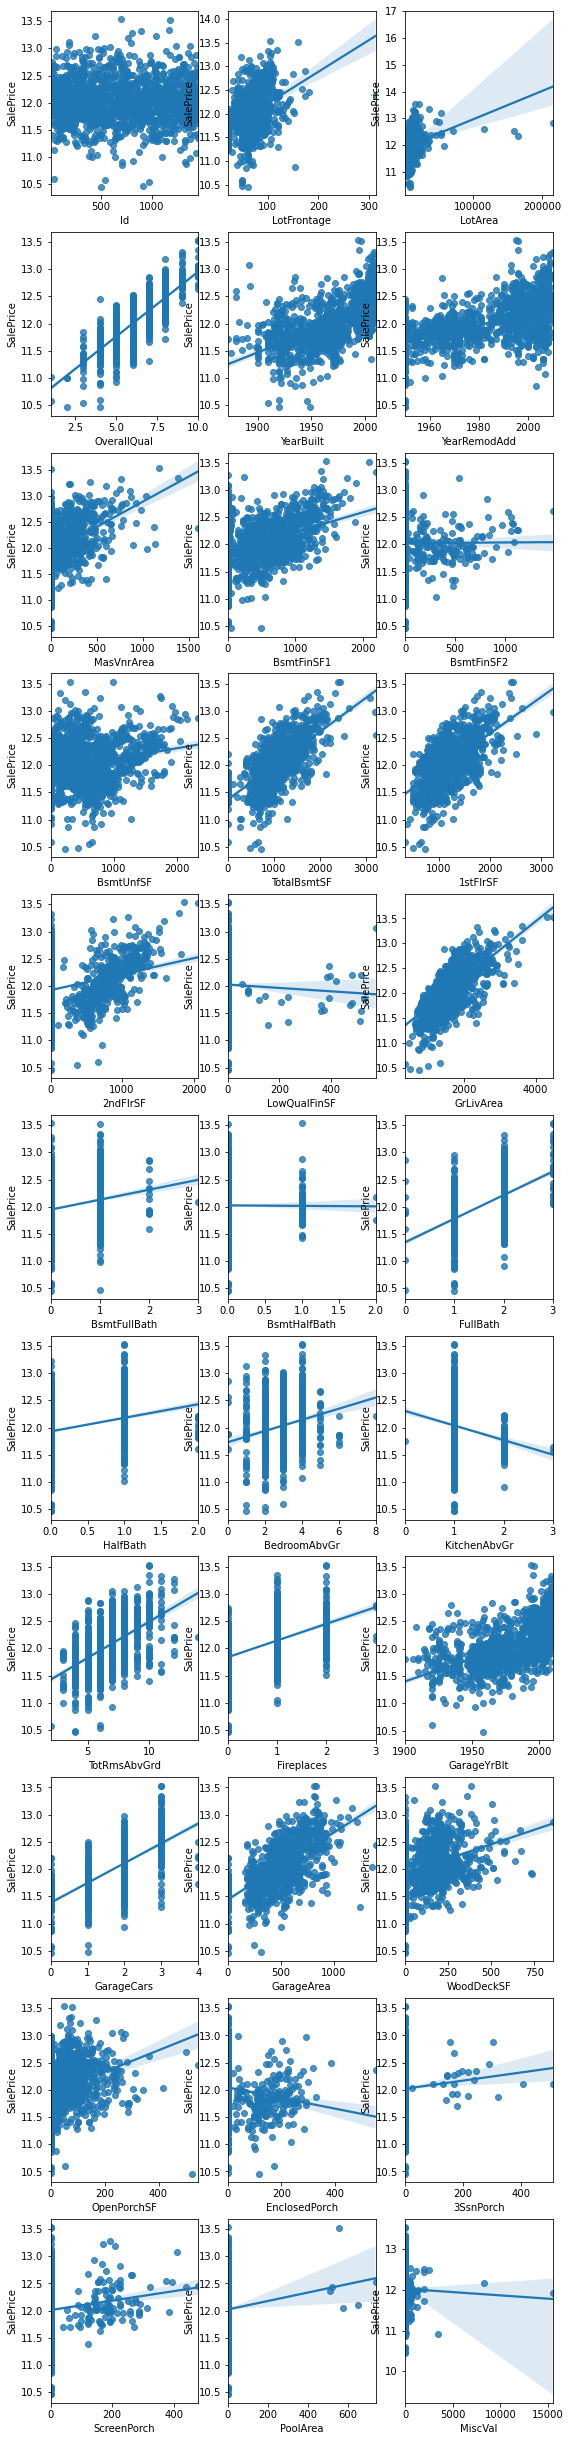

In [52]:
row = 11
col = 3 

fig, axs = plt.subplots(row,col, figsize = (col*3,row*4))

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(li_num):
            sns.regplot(train[li_num[i]],target , ax = axs[r][c])

In [53]:
stats.pearsonr(train[li_num[11]],target)

(0.6205000189170755, 6.572494159280828e-156)

In [54]:
strong_num = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF',
             'FullBath','TotRmsAbvGrd','GarageYrBlt','GarageCars','GrLivArea']

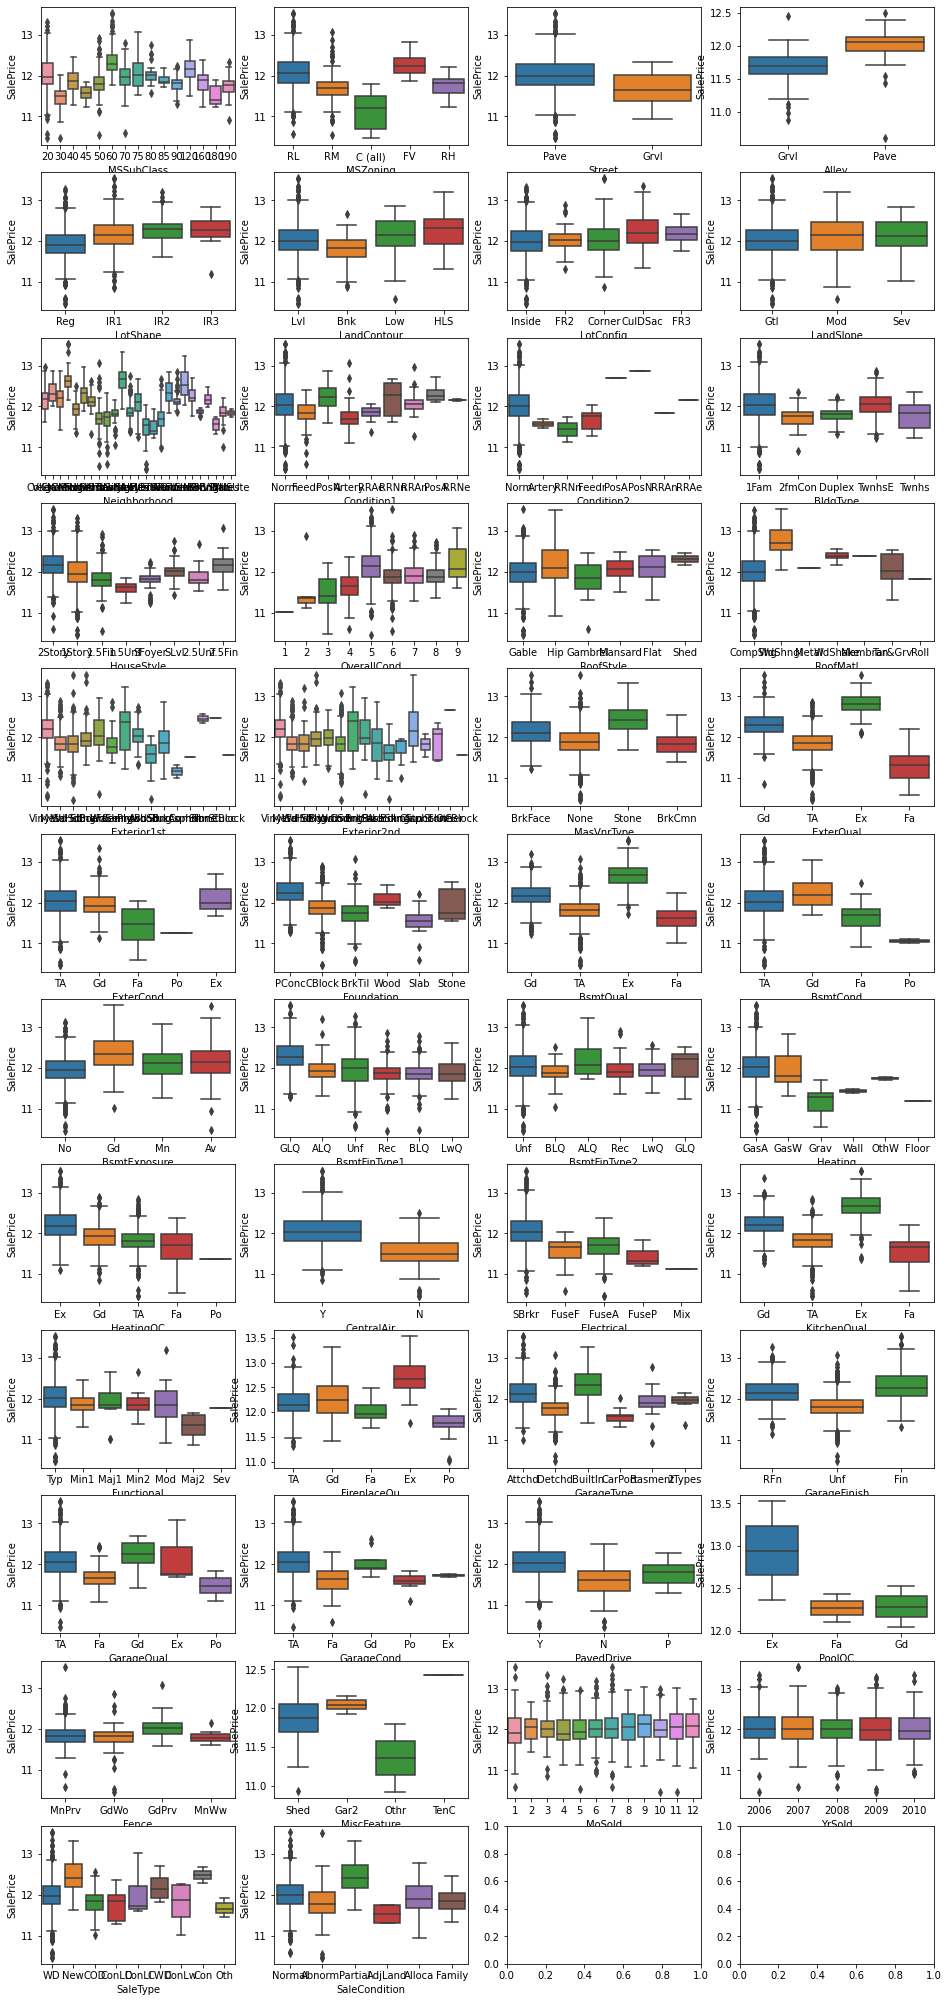

In [55]:
row = 12
col = 4 

fig, axs = plt.subplots(row,col, figsize = (col*4,row*3))

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(li_obj):
            sns.boxplot(train[li_obj[i]],target , ax = axs[r][c])

In [56]:
strong_obj = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

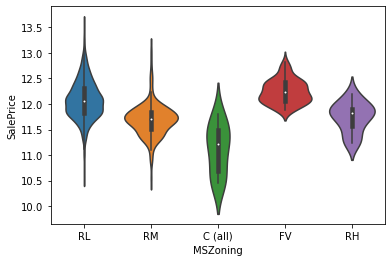

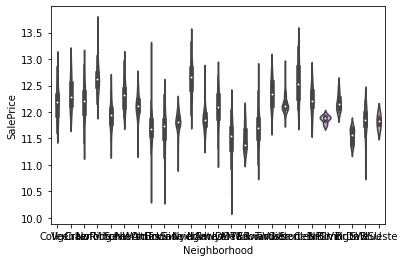

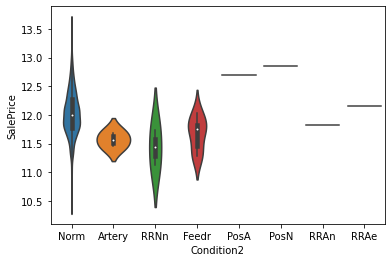

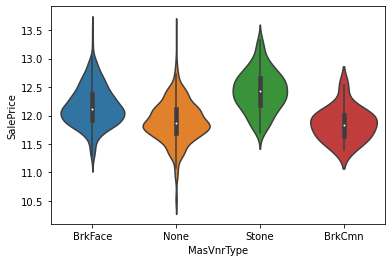

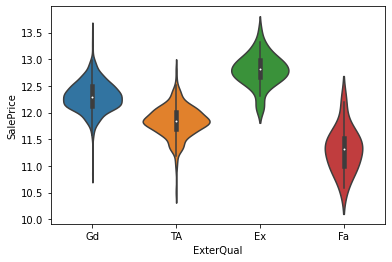

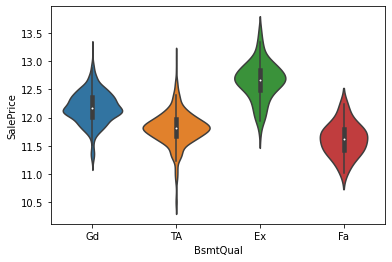

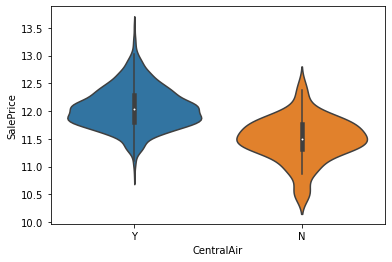

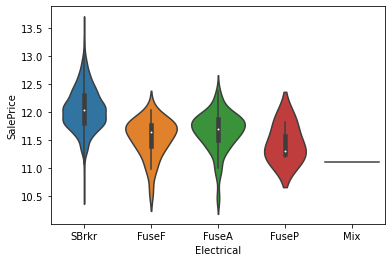

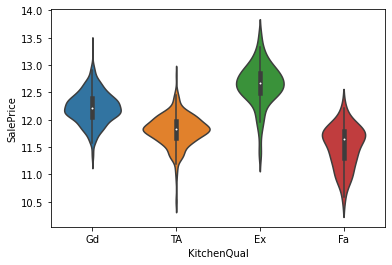

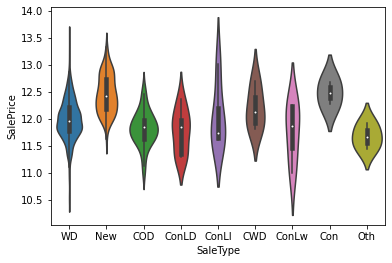

In [57]:
for li in strong_obj:
    sns.violinplot(x= li, y = target, data=train)
    plt.show()

In [58]:
numeric_features = df.dtypes[df.dtypes != "object"].index

In [59]:
from scipy.stats import skew 
skewness = df[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [60]:
high_skewness = skewness[abs(skewness) > 0.5]
skew_feat = high_skewness.index

In [61]:
print(high_skewness)
print(skew_feat)

MiscVal              21.939672
PoolArea             17.688664
haspool              15.494756
LotArea              13.109495
LowQualFinSF         12.084539
3SsnPorch            11.372080
LandSlope             4.973254
KitchenAbvGr          4.300550
BsmtFinSF2            4.144503
EnclosedPorch         4.002344
ScreenPorch           3.945101
BsmtHalfBath          3.929996
MasVnrArea            2.621719
OpenPorchSF           2.529358
WoodDeckSF            1.844792
Total_porch_sf        1.379521
1stFlrSF              1.257286
Total_sqr_footage     1.253666
LotFrontage           1.103039
GrLivArea             1.068750
TotalSF               1.009157
BsmtFinSF1            0.980645
BsmtUnfSF             0.919688
2ndFlrSF              0.861556
TotRmsAbvGrd          0.749232
Fireplaces            0.725278
HalfBath              0.696666
TotalBsmtSF           0.671751
BsmtFullBath          0.622415
OverallCond           0.569314
YearBuilt            -0.599194
GarageFinish         -0.609953
LotShape

In [62]:
df[['MiscVal', 'PoolArea', 'haspool', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', 'Total_porch_sf', '1stFlrSF', 'Total_sqr_footage',
       'LotFrontage', 'GrLivArea', 'TotalSF', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'TotalBsmtSF',
       'BsmtFullBath', 'OverallCond', 'YearBuilt', 'GarageFinish', 'LotShape',
       'MoSold', 'Alley', 'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence',
       'ExterCond', 'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual',
       'CentralAir', 'GarageCond', 'GarageYrBlt', 'hasgarage', 'Functional',
       'hasbsmt', 'Street', 'PoolQC']].head(3)

,MiscVal,PoolArea,haspool,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,...,BsmtFinType2,GarageQual,CentralAir,GarageCond,GarageYrBlt,hasgarage,Functional,hasbsmt,Street,PoolQC
0,0,0,0,8450,0,0,0,1,0.0,0,...,6,5,1,5,2003.0,1,6,1,1,3
1,0,0,0,9600,0,0,0,1,0.0,0,...,6,5,1,5,1976.0,1,6,1,1,3
2,0,0,0,11250,0,0,0,1,0.0,0,...,6,5,1,5,2001.0,1,6,1,1,3


In [63]:
from scipy.special import boxcox1p
lam = 0.15
for feat in skew_feat:
    df[feat] = boxcox1p(df[feat], lam)

In [64]:
df[['MiscVal', 'PoolArea', 'haspool', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', 'Total_porch_sf', '1stFlrSF', 'Total_sqr_footage',
       'LotFrontage', 'GrLivArea', 'TotalSF', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'TotalBsmtSF',
       'BsmtFullBath', 'OverallCond', 'YearBuilt', 'GarageFinish', 'LotShape',
       'MoSold', 'Alley', 'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence',
       'ExterCond', 'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual',
       'CentralAir', 'GarageCond', 'GarageYrBlt', 'hasgarage', 'Functional',
       'hasbsmt', 'Street', 'PoolQC']].head(3)

,MiscVal,PoolArea,haspool,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,...,BsmtFinType2,GarageQual,CentralAir,GarageCond,GarageYrBlt,hasgarage,Functional,hasbsmt,Street,PoolQC
0,0.0,0.0,0.0,19.212182,0.0,0.0,0.0,0.730463,0.0,0.0,...,2.259674,2.055642,0.730463,2.055642,14.187527,0.730463,2.259674,0.730463,0.730463,1.540963
1,0.0,0.0,0.0,19.712205,0.0,0.0,0.0,0.730463,0.0,0.0,...,2.259674,2.055642,0.730463,2.055642,14.145138,0.730463,2.259674,0.730463,0.730463,1.540963
2,0.0,0.0,0.0,20.347241,0.0,0.0,0.0,0.730463,0.0,0.0,...,2.259674,2.055642,0.730463,2.055642,14.184404,0.730463,2.259674,0.730463,0.730463,1.540963


In [65]:
df = pd.get_dummies(df)
print(df.shape)

(2917, 230)


In [66]:
new_train = df[:train.shape[0]]
new_test = df[train.shape[0]:]

In [67]:
new_train = pd.concat([new_train,target], axis=1, sort=False)

<AxesSubplot:>

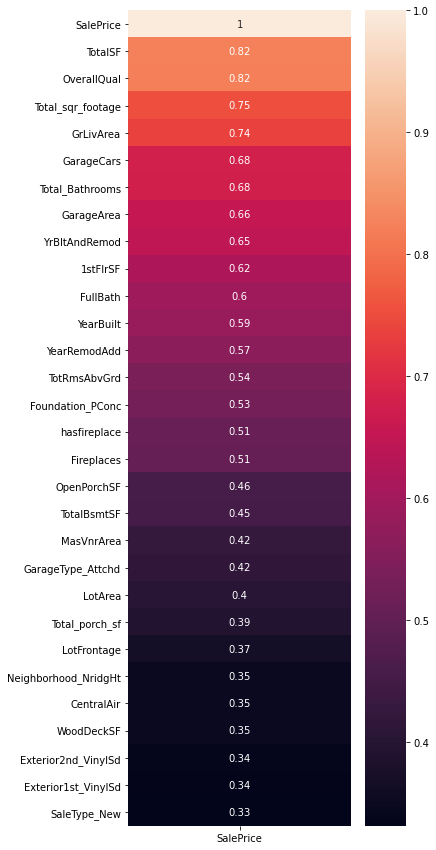

In [68]:
corr_new_train = new_train.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],
                                ascending=False).head(30),annot=True)

In [69]:
col_corr_dict = corr_new_train['SalePrice'].sort_values(ascending=False).to_dict()

In [70]:
best_columns=[]
for key,value in col_corr_dict.items():
    if ((value>=0.33) & (value<0.9)) | (value<=-0.325):
        best_columns.append(key)
print(len(best_columns))

38


In [71]:
new_train = new_train.drop(['SalePrice'], axis=1)
new_train = new_train.drop(['Id'], axis=1)
new_test = new_test.drop(['Id'], axis=1)

In [72]:
final_train = new_train[best_columns]
final_test = new_test[best_columns]
final_num = list(final_train.columns)

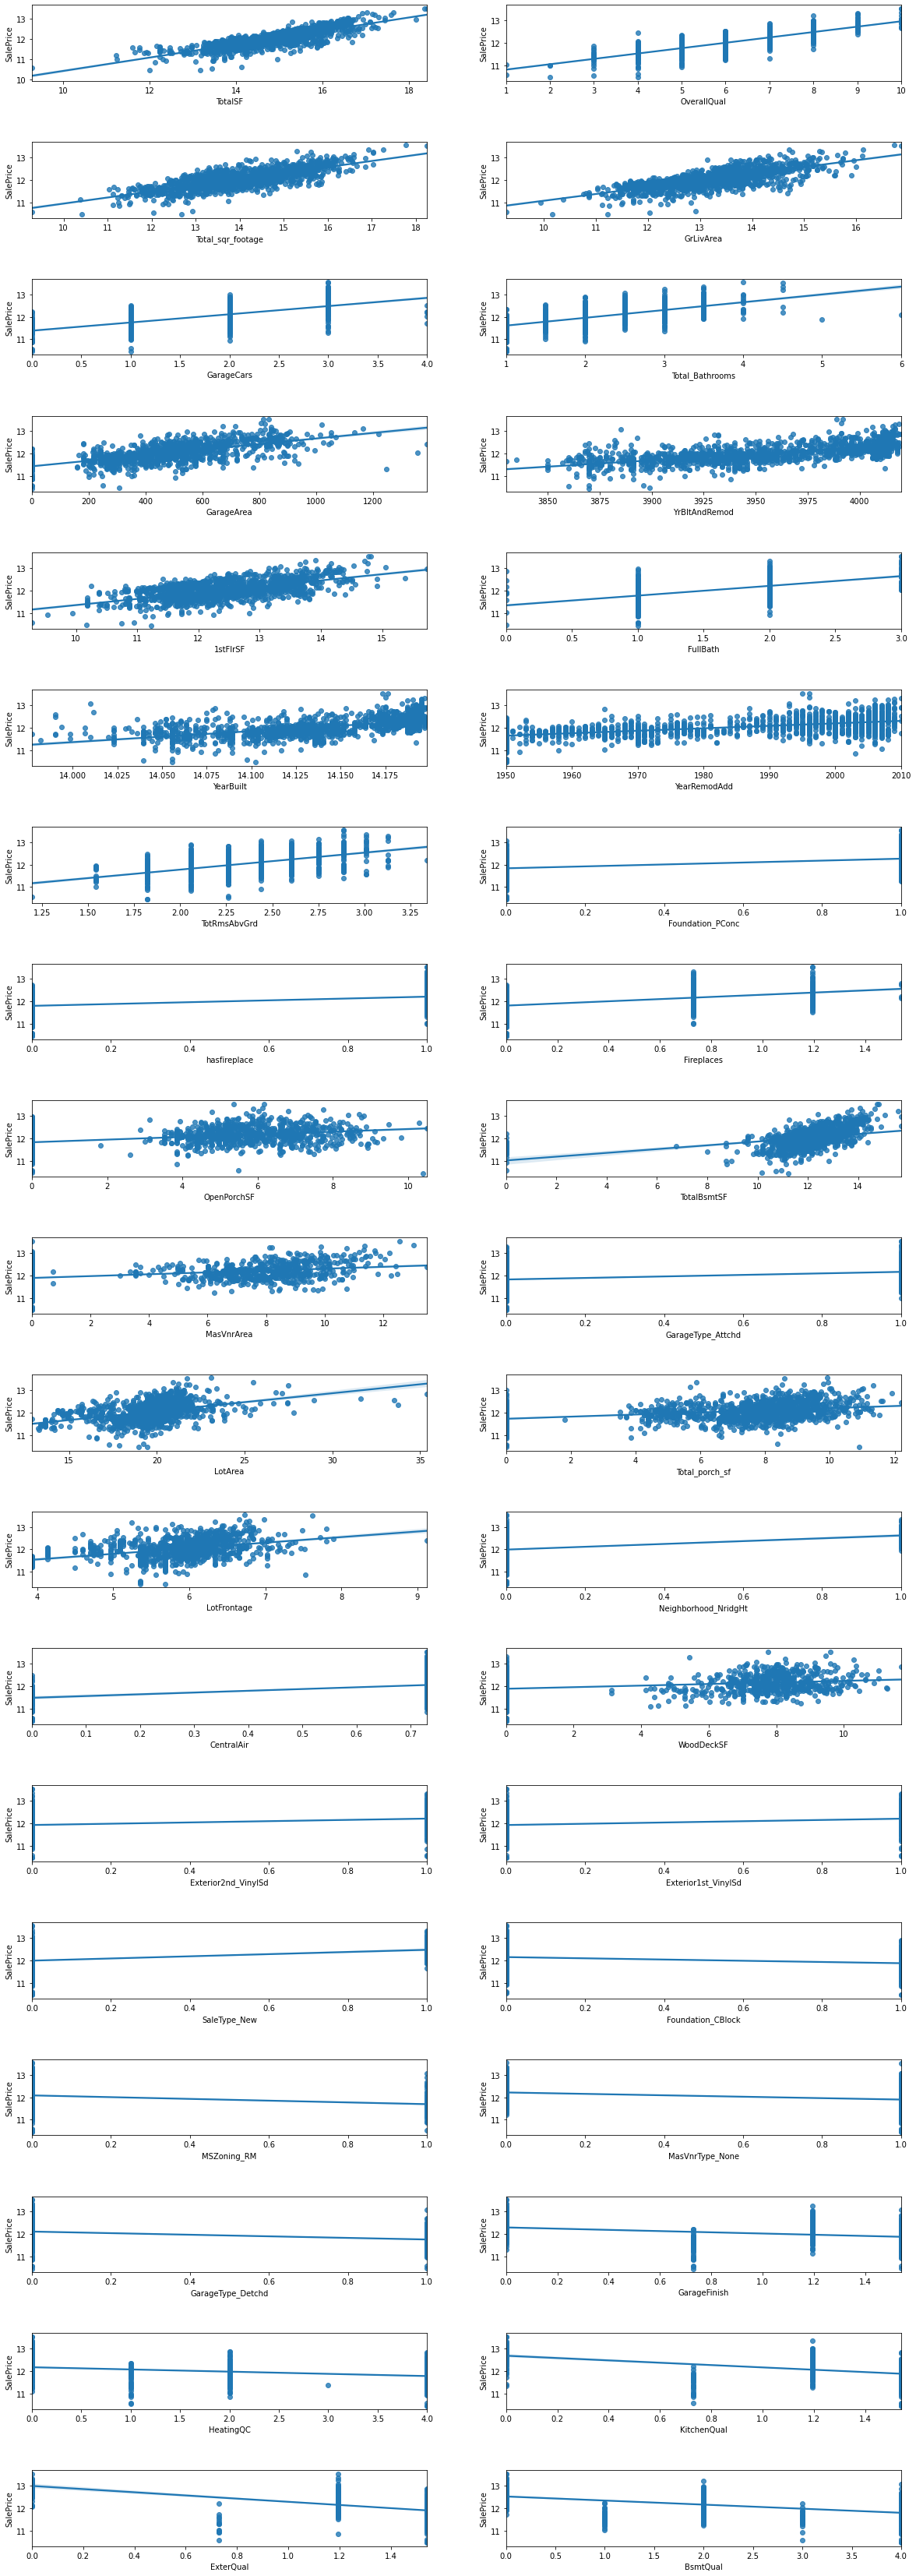

In [73]:
row = 19
col = 2

fig, axs = plt.subplots(row,col, figsize = (20,60))
fig.subplots_adjust(hspace=0.8)

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(best_columns):
            sns.regplot(final_train[final_num[i]],target,fit_reg=True,marker='o', ax = axs[r][c])

In [76]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

In [77]:
from sklearn.preprocessing import RobustScaler

In [78]:
rbst_scaler=RobustScaler()
X_rbst=rbst_scaler.fit_transform(new_train)
test_rbst=rbst_scaler.transform(new_test)

In [79]:
import statsmodels.api as sm

In [80]:
model = sm.OLS(target.values, new_train)

In [81]:
re = model.fit()

In [82]:
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     104.6
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:00:02   Log-Likelihood:                 1389.0
No. Observations:                1458   AIC:                            -2362.
Df Residuals:                    1250   BIC:                            -1263.
Df Model:                         207                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass               -0.0013      0.003     -0.376      0.707      -0.008       0.005
LotFrontage               0.0085      0.008      1.036      0.301      -0.008       0.025
LotArea                   0.0225      0.003      8.331      0.000       0.017       0.028
Street                    0.1257      0.069      1.815      0.070      -0.010       0.262
Alley                     0.0153      0.021      0.726      0.468      -0.026       0.057
LotShape                  0.0055      0.005      1.206      0.228      -0.003       0.014
LandSlope                 0.0228      0.021      1.061      0.289      -0.019       0.065
OverallQual               0.0414      0.004      9.369      0.000       0.033       0.050
OverallCond               0.1670      0.015     10.942      0.000       0.137       0.197
YearBuilt               -14.4624     18.658     -0.775      0.438     -51.066      22.141
YearRemodAdd             -0.0242      0.030     -0.807      0.420      -0.083       0.035
MasVnrArea                0.0010      0.003      0.389      0.697      -0.004       0.006
ExterQual                -0.0237      0.014     -1.659      0.097      -0.052       0.004
ExterCond                 0.0079      0.013      0.611      0.541      -0.018       0.033
BsmtQual                 -0.0083      0.004     -2.220      0.027      -0.016      -0.001
BsmtCond                  0.0106      0.008      1.321      0.187      -0.005       0.026
BsmtExposure             -0.0055      0.006     -0.875      0.382      -0.018       0.007
BsmtFinType1             -0.0014      0.002     -0.614      0.539      -0.006       0.003
BsmtFinSF1                0.0001      0.002      0.064      0.949      -0.004       0.004
BsmtFinType2             -0.0119      0.013     -0.942      0.347      -0.037       0.013
BsmtFinSF2               -0.0041      0.002     -2.261      0.024      -0.008      -0.001
BsmtUnfSF                -0.0008      0.002     -0.410      0.682      -0.004       0.003
TotalBsmtSF               0.0105      0.020      0.535      0.593      -0.028       0.049
HeatingQC                -0.0075      0.002     -3.455      0.001      -0.012      -0.003
CentralAir                0.0689      0.023      2.981      0.003       0.024       0.114
1stFlrSF                  0.0208      0.020      1.027      0.304      -0.019       0.061
2ndFlrSF                  0.0283      0.010      2.800      0.005       0.008       0.048
LowQualFinSF              0.0027      0.004      0.631      0.528      -0.006       0.011
GrLivArea                 0.0125      0.039      0.323      0.747      -0.063       0.088
BsmtFullBath             -0.0851      0.106     -0.806      0.420      -0.292       0.122
BsmtHalfBath             -0.0487      0.056     -0.865      0.387      -0.159       0.062
FullBath               

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = new_train.columns
vif['vif'] = [variance_inflation_factor(
    new_train.values, i) for i in range(new_train.shape[1])]

In [85]:
vif.sort_values(by='vif',ascending=False)[165:190]

,Features,vif
40,GarageYrBlt,44201.767159
63,haspool,3375.516181
52,PoolArea,3114.411164
61,Total_Bathrooms,495.719012
26,2ndFlrSF,471.396022
58,TotalSF,318.881940
64,has2ndfloor,311.452414
22,TotalBsmtSF,258.905595
31,FullBath,249.237321
29,BsmtFullBath,217.805638


In [86]:
from sklearn.preprocessing import RobustScaler
rbst_scaler=RobustScaler()
X_rbst=rbst_scaler.fit_transform(new_train)
test_rbst=rbst_scaler.transform(new_test)

In [87]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [88]:
kfold = KFold(n_splits=4)

In [89]:
random_state = 1
reg = []

reg.append(Lasso(random_state = random_state))
reg.append(ElasticNet(random_state = random_state))
reg.append(RandomForestRegressor(random_state=random_state))
reg.append(GradientBoostingRegressor(random_state=random_state))
reg.append(XGBRegressor(silent=True,random_state=random_state))
reg.append(LGBMRegressor(verbose_eval=False,random_state = random_state))

In [90]:
reg_results = []

for regre in reg :
    reg_results.append(np.mean(np.sqrt(-cross_val_score(regre, X_rbst, y = target,scoring = 'neg_mean_squared_error',
                                       cv = kfold, n_jobs=-4))))

[14:04:52] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:04:56] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:04:58] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are 

In [91]:
reg_means = []
reg_std = []
for reg_result in reg_results:
    reg_means.append(reg_result.mean())
    reg_std.append(reg_result.std())

In [92]:
reg_re = pd.DataFrame({"CrossValMeans":reg_means,"CrossValerrors": reg_std})
reg_re

,CrossValMeans,CrossValerrors
0,0.378693,0.0
1,0.378227,0.0
2,0.136696,0.0
3,0.121699,0.0
4,0.131375,0.0
5,0.128254,0.0


In [93]:
# Gradient boosting 파라미터 튜닝
GBC = GradientBoostingRegressor()
gb_param_grid = {'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsGBC.fit(X_rbst,target)
GBC_best = gsGBC.best_estimator_

# 최고 점수
gsGBC.best_score_

Fitting 4 folds for each of 72 candidates, totalling 288 fits


-0.017491391544616278

In [94]:
# XGBoost 파라미터 튜닝 
#xgb_param_grid = {'learning_rate': [1,0.1,0.01,0.001],
#              'n_estimators': [50, 100, 200, 500, 1000,3000],
#              'max_depth' : [1,3,5,10,50],
#              'subsample': [0.6, 0.7, 1.0],
#              'colsample_bytree' : [0.3,0.5,0.7,1],
#              'scale_pos_weight' : [0.5,1],
#              'reg_alpha': [0,0.05,0.0005,0.000005]
#               }

In [95]:
# XGBoost 파라미터 튜닝 

XGB = XGBRegressor()
xgb_param_grid = {'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000],
              'max_depth' : [1,3,5,10,50]}
gsXGB = GridSearchCV(XGB,param_grid = xgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsXGB.fit(X_rbst,target)
XGB_best = gsXGB.best_estimator_

# 최고 점수
gsXGB.best_score_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


-0.014016724986766704

In [96]:
#LGBMClassifier 파라미터 튜닝
LGB = LGBMRegressor()
lgb_param_grid = {
    'num_leaves' : [1,5,10],
    'learning_rate': [1,0.1,0.01,0.001],
    'n_estimators': [50, 100, 200, 500, 1000,5000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
}
gsLGB = GridSearchCV(LGB,param_grid = lgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsLGB.fit(X_rbst,target)
LGB_best = gsLGB.best_estimator_

# 최고 점수
gsLGB.best_score_

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


-0.018533039905470255

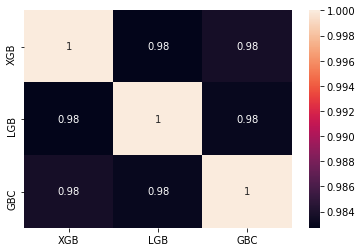

In [97]:
test_Survived_GBC = pd.Series(GBC_best.predict(test_rbst), name="GBC")
test_Survived_XGB = pd.Series(XGB_best.predict(test_rbst), name="XGB")
test_Survived_LGB = pd.Series(LGB_best.predict(test_rbst), name="LGB")

ensemble_results = pd.concat([test_Survived_XGB,test_Survived_LGB,
                              test_Survived_GBC],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [98]:
ensemble = np.expm1(0.1*test_Survived_GBC + 0.8*test_Survived_XGB + 0.1*test_Survived_LGB)
submission = pd.DataFrame({
    "Id" :test['Id'],
    "SalePrice": ensemble
})
submission.head()

,Id,SalePrice
0,1461,124210.704701
1,1462,163252.112099
2,1463,182544.363902
3,1464,197734.337047
4,1465,196804.535560


In [99]:
#submission.to_csv('ensemblesubmission.csv', index=False)

In [100]:
from sklearn.ensemble import VotingRegressor

In [101]:
votingC = VotingRegressor(estimators=[('XGB', XGB_best), ('LGB', LGB_best), ('GBC',GBC_best)], n_jobs=4)
votingC = votingC.fit(X_rbst, target)  

In [102]:
test_SalePrice = pd.Series(votingC.predict(test_rbst), name="SalePrice")

In [103]:
submission = pd.DataFrame({
    "Id" :test['Id'],
    "SalePrice": np.expm1(test_SalePrice)
})
submission.head()

,Id,SalePrice
0,1461,124582.091213
1,1462,162412.966634
2,1463,180431.377140
3,1464,195791.721030
4,1465,192858.303201


In [104]:
#submission.to_csv('votingsubmission.csv', index=False)

In [111]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LogisticRegression

In [112]:
params = {'meta_regressor__C': [0.1, 1.0, 10.0, 100.0],
          'use_features_in_secondary' : [True, False]}

In [113]:
clf1 = XGB_best
clf2 = LGB_best
clf3 = GBC_best

lr = LogisticRegression()
st_re= StackingRegressor(regressors=[clf1, clf2, clf3], meta_regressor=RandomForestRegressor())
st_mod = st_re.fit(X_rbst, target)
st_pred = st_mod.predict(test_rbst)

In [114]:
submission = pd.DataFrame({
    "Id" :test['Id'],
    "SalePrice": np.expm1(st_pred)
})
submission.head()

,Id,SalePrice
0,1461,128234.393058
1,1462,155011.746276
2,1463,176497.677803
3,1464,199975.550105
4,1465,195721.123041


In [115]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

In [116]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=new_train):
    rmse = np.sqrt(-cross_val_score(model, X_rbst, target,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return (rmse)

In [117]:
alphas_ridge = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_enect = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
enect_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [118]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor

In [119]:
ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_ridge, cv=kfolds))

In [120]:
lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas=alphas_lasso,
                              random_state=2, cv=kfolds))

In [121]:
enet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=alphas_enect,
                                        cv=kfolds, l1_ratio=enect_l1ratio))

In [122]:
svr = make_pipeline(RobustScaler(),
                      SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [123]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, enet,
                                            GBC_best, XGB_best, LGB_best),
                                meta_regressor=XGB_best,
                                use_features_in_secondary=True)

In [124]:
score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(enet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(GBC_best)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(XGB_best)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(LGB_best)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

Kernel Ridge score: 0.1099 (0.0168)

Lasso score: 0.1091 (0.0165)

ElasticNet score: 0.1091 (0.0164)

SVR score: 0.1106 (0.0181)

Lightgbm score: 0.1275 (0.0146)

GradientBoosting score: 0.1182 (0.0148)

Xgboost score: 0.1356 (0.0129)



In [125]:
stack_gen_model = stack_gen.fit(np.array(X_rbst), np.array(target))
elastic_model_full_data = enet.fit(X_rbst, target)
lasso_model_full_data = lasso.fit(X_rbst, target)
ridge_model_full_data = ridge.fit(X_rbst, target)
svr_model_full_data = svr.fit(X_rbst, target)
gbr_model_full_data = GBC_best.fit(X_rbst, target)
xgb_model_full_data = XGB_best.fit(X_rbst, target)
lgb_model_full_data = LGB_best.fit(X_rbst, target)

In [126]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X))))

In [127]:
pred = np.floor(np.expm1(blend_models_predict(test_rbst)))
submission = pd.DataFrame({
    "Id" :test['Id'],
    "SalePrice": pred
})
submission.head()

,Id,SalePrice
0,1461,121220.0
1,1462,160553.0
2,1463,181566.0
3,1464,195195.0
4,1465,193522.0


In [128]:
submission.to_csv('final_submission.csv', index=False)